In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import signatory

rc('font', **{'family':'serif', 'serif':['Times New Roman']})
rc('font', size=8)
rc('legend', fontsize=8)
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')

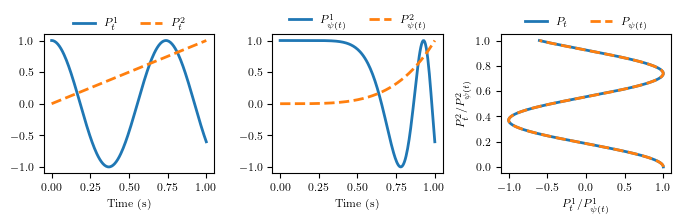

In [5]:
t = torch.linspace(0, 1, 200).to(dtype=torch.float64)
phi_t = t ** 4

p1 = torch.cos(8.5 * t)
p2 = t
p1_phi_t = torch.cos(8.5 * phi_t)
p2_phi_t = phi_t

Pt1 = r"$P_t^1 = \cos (8.5 t)$"
Pt2 = r"$P_t^2 = t$"
Pr1 = r"$P_{\psi(t)}^1 = \cos (8.5 t^4)$"
Pr2 = r"$P_{\psi(t)}^2 = t^4$"
Pt1 = r"$P_t^1$"
Pt2 = r"$P_t^2$"
Pr1 = r"$P_{\psi(t)}^1$"
Pr2 = r"$P_{\psi(t)}^2$"
data = {Pt1: p1, Pt2: p2, Pr1: p1_phi_t, Pr2: p2_phi_t}

df = pd.DataFrame(data, index=t.tolist())

# 7.14 is IEEE trans textwidth
cm = 1/2.54  # centimeters in inches
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17.4*cm, 17.4*cm/3))

ax1.plot(df.index, df[Pt1], label=Pt1, linewidth=2)
ax1.plot(df.index, df[Pt2], "--", label=Pt2, linewidth=2)
ax1.legend(bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), loc='lower center', ncol=2, borderaxespad=0., frameon=False)
ax1.set_xlabel("Time (s)")

ax2.plot(df.index, df[Pr1], label=Pr1, linewidth=2)
ax2.plot(df.index, df[Pr2], "--", label=Pr2, linewidth=2)
ax2.legend(bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), loc='lower center', ncol=2, borderaxespad=0., frameon=False)
ax2.set_xlabel("Time (s)")

ax3.plot(df[Pt1], df[Pt2], label="$P_t$", linewidth=2)
ax3.plot(df[Pr1], df[Pr2], "--", label="$P_{\psi(t)}$", linewidth=2)
ax3.legend(bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), loc='lower center', ncol=2, borderaxespad=0., frameon=False)
ax3.set_xlabel("$P_t^1 / P_{\psi(t)}^1$")
ax3.set_ylabel("$P_t^2 / P_{\psi(t)}^2$")

plt.tight_layout()
plt.savefig("pathsig_invariance.pdf")

In [3]:
Pt = torch.vstack([p1, p2]).T.unsqueeze(0)
sig_Pt = signatory.signature(Pt, 2).squeeze()
print(sig_Pt)

Pr = torch.vstack([p1_phi_t, p2_phi_t]).T.unsqueeze(0)
sig_Pr = signatory.signature(Pr, 2).squeeze()
print(sig_Pr)

tensor([-1.6020,  1.0000,  1.2832, -0.9061, -0.6959,  0.5000],
       dtype=torch.float64)
tensor([-1.6020,  1.0000,  1.2832, -0.9062, -0.6958,  0.5000],
       dtype=torch.float64)
